### Student Name: Anthony Viscovich

In [17]:
#import the required modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import tree

### Step 1 – Load the data and extract the features

In [2]:
features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 
            'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
            'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip']

file_path = 'trip_data.csv' #TODO: provide the file path or URL to the dataset `trip_data.csv`
df = pd.read_csv(file_path, usecols=features)

#after the data is loaded in the dataframe, you would normally perform preliminary analysis to verify the data.
# For example, using df.head() and df.describe() but you can skip that step for now. 

#assign the input features to a variable called 'X' and the labels in a variable called 'y'
X = df.iloc[:,0:14].to_numpy() #input features
y = df.iloc[:,14].tolist() #labels

### Step 2 – Split the data
Hint: use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from scikit-learn.

In [4]:
seed = 100 #TODO: provide an integer for the random number generator.

#Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, #TODO: provide the test_size (refer to the instructions for the assignment)
                                                    random_state = seed, #seed the random generator for reproducibilty
                                                    stratify = y #TODO: provide the variable
                                                   )

#Note: X_train and y_train are the input features and labels for the training set respectively.
#Note: X_test and y_test are the input features and labels for the test set respectively.

### Step 3 - Create the decision tree
Hint: use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) in scikit-learn. Here is an example on how to use build a [decision tree for classification](https://scikit-learn.org/stable/modules/tree.html#classification).

In [23]:
#Instantiate the Decision Tree Classifier object 
dt_classifier = DecisionTreeClassifier(criterion= 'gini', #TODO: choose either 'gini' or 'entropy'
                                       max_depth= 12 #TODO: set the value (refer to the instructions above)
                                      )

#TODO: Train Decision Tree Classifier using the `fit` method
dt_classifier.fit(X_train, y_train)

#TODO: Make predictions with `X_test` and store the result in a variable called `y_pred`
y_pred = dt_classifier.predict(X_test)

In [8]:
print(y_pred)
print(y_test)

['good' 'good' 'standard' ... 'no-tip' 'good' 'no-tip']
['good', 'good', 'standard', 'standard', 'standard', 'good', 'low', 'standard', 'good', 'low', 'good', 'no-tip', 'standard', 'standard', 'good', 'good', 'standard', 'standard', 'standard', 'standard', 'low', 'no-tip', 'standard', 'good', 'standard', 'standard', 'standard', 'standard', 'low', 'standard', 'no-tip', 'low', 'good', 'no-tip', 'low', 'standard', 'standard', 'low', 'standard', 'no-tip', 'standard', 'standard', 'low', 'standard', 'no-tip', 'standard', 'standard', 'good', 'standard', 'good', 'no-tip', 'good', 'standard', 'no-tip', 'no-tip', 'no-tip', 'standard', 'standard', 'standard', 'good', 'standard', 'standard', 'low', 'standard', 'no-tip', 'good', 'standard', 'no-tip', 'no-tip', 'no-tip', 'standard', 'standard', 'low', 'good', 'low', 'standard', 'standard', 'standard', 'low', 'low', 'standard', 'no-tip', 'no-tip', 'no-tip', 'good', 'no-tip', 'standard', 'no-tip', 'no-tip', 'low', 'standard', 'standard', 'no-tip', 'lo

#### Evaluate the prediction accuracy
Hint: use the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) to determine how many observations were classified correctly. Use `y_test` and `y_pred` for the calculations.

In [24]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
metrics.accuracy_score(y_test, y_pred)

0.8757148673012427

### Step 4 - Visualize the decision tree
Hint: use the export_graphviz method. An [example is shown here](https://scikit-learn.org/stable/modules/tree.html#classification). Alternatively, you may use your preferred library/tool to display the tree.

[Text(88.72494154085987, 209.07692307692307, 'X[11] <= 7.27\ngini = 0.692\nsamples = 120358\nvalue = [19748, 27982, 18306, 54322]'),
 Text(29.970524286183135, 192.35076923076923, 'X[11] <= 6.34\ngini = 0.669\nsamples = 10087\nvalue = [4687, 1840, 2773, 787]'),
 Text(18.68164588119462, 175.62461538461537, 'X[6] <= 4.25\ngini = 0.666\nsamples = 4375\nvalue = [635, 1335, 2014, 391]'),
 Text(13.409763702001971, 158.89846153846153, 'X[11] <= 5.945\ngini = 0.694\nsamples = 2599\nvalue = [634, 1116, 593, 256]'),
 Text(7.920413521496555, 142.1723076923077, 'X[11] <= 4.805\ngini = 0.612\nsamples = 1995\nvalue = [165, 1066, 592, 172]'),
 Text(3.186478503446013, 125.44615384615385, 'X[6] <= 3.25\ngini = 0.334\nsamples = 462\nvalue = [0, 86, 367, 9]'),
 Text(1.6848047259599608, 108.72, 'X[11] <= 3.805\ngini = 0.557\nsamples = 134\nvalue = [0, 68, 57, 9]'),
 Text(0.8790285526747621, 91.99384615384615, 'X[11] <= 3.79\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37, 0]'),
 Text(0.5860190351165081, 75.

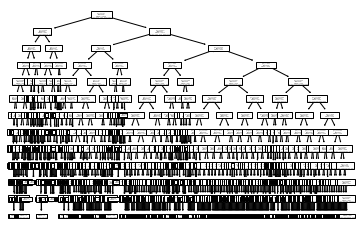

In [25]:
#TODO: Display the decision tree
tree.plot_tree(dt_classifier)

### Summarize the results using one paragraph (2-5 sentences)

Its difficult to tell how the model performed through the tree. From the accuracy score, 87%, we can see that the model was quite effective when predicting the tip amount. The model can still have a few things done to it to fix the accuracy and achieve over 90%.